# Лабораторная работа №5
## Выполнил: Концебалов О.С.
## Группа: М8О-409Б-22

## ГРАДИЕНТНЫЙ БУСТИНГ
### Для задачи классификации

Обучим базовую модель

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.model_selection import train_test_split, cross_test_score, learning_curve, testidation_curve, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('heart.csv')


X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
baseline_gb = GradientBoostingClassifier(random_state=42)
baseline_gb.fit(X_train, y_train)
train_pred_baseline = baseline_gb.predict(X_train)
test_pred_baseline = baseline_gb.predict(X_test)
test_proba_baseline = baseline_gb.predict_proba(X_test)[:, 1]

print("base")
print(f"n_est {baseline_gb.n_estimators}")
print(f"max_depth {baseline_gb.max_depth}")
print("\train")
print(f"accuracy: {accuracy_score(y_train, train_pred_baseline):.4f}")
print(f"F1-score: {f1_score(y_train, train_pred_baseline):.4f}")
print("\test")
print(f"accuracy: {accuracy_score(y_test, test_pred_baseline):.4f}")
print(f"F1-score: {f1_score(y_test, test_pred_baseline):.4f}")
print(f"\ntrain-test acc {accuracy_score(y_train, train_pred_baseline) - accuracy_score(y_test, test_pred_baseline):.4f}")

base
n_est 100
max_depth 3
	rain
accuracy: 0.9902
F1-score: 0.9905
	est
accuracy: 0.9756
F1-score: 0.9763

train-test acc 0.0146


Метрики прекрасные, посмотрим на зависимости от количества деревьев

n= 10: trainAcc=0.8768, test Acc=0.8439, Diff=0.0329, trainLoss=0.8017
n= 20: trainAcc=0.9122, test Acc=0.8927, Diff=0.0195, trainLoss=0.5980
n= 30: trainAcc=0.9341, test Acc=0.9024, Diff=0.0317, trainLoss=0.4839
n= 50: trainAcc=0.9768, test Acc=0.9415, Diff=0.0354, trainLoss=0.3429
n= 70: trainAcc=0.9817, test Acc=0.9659, Diff=0.0159, trainLoss=0.2826
n=100: trainAcc=0.9902, test Acc=0.9756, Diff=0.0146, trainLoss=0.2194
n=150: trainAcc=0.9963, test Acc=0.9805, Diff=0.0159, trainLoss=0.1392
n=200: trainAcc=0.9963, test Acc=0.9805, Diff=0.0159, trainLoss=0.0903
n=300: trainAcc=1.0000, test Acc=1.0000, Diff=0.0000, trainLoss=0.0402
n=400: trainAcc=1.0000, test Acc=1.0000, Diff=0.0000, trainLoss=0.0184
n=500: trainAcc=1.0000, test Acc=1.0000, Diff=0.0000, trainLoss=0.0086


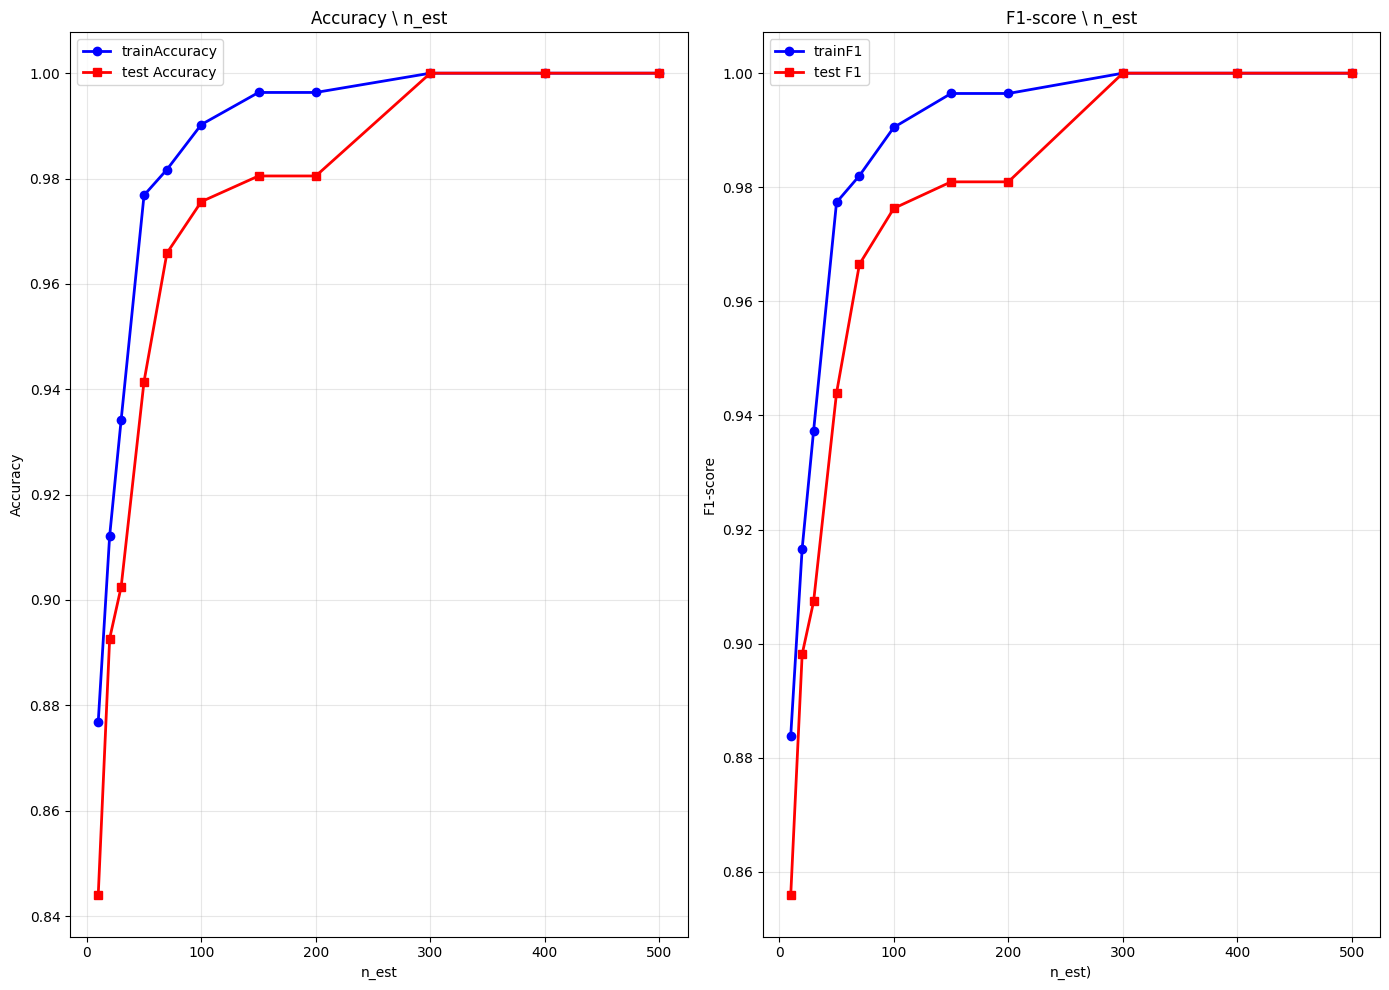


n_est 300
test accuracy: 1.0000


In [11]:
n_estimators_range = [10, 20, 30, 50, 70, 100, 150, 200, 300, 400, 500]
train_accuracies = []
test_accuracies = []
train_f1_scores = []
test_f1_scores = []
train_losses = []  

for n in n_estimators_range:
    gb = GradientBoostingClassifier(
        n_estimators=n,
        random_state=42,
        learning_rate=0.1
    )
    gb.fit(X_train, y_train)
    
    train_pred = gb.predict(X_train)
    test_pred = gb.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    train_f1 = f1_score(y_train, train_pred)
    test_f1 = f1_score(y_test, test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    train_losses.append(gb.train_score_[-1]) 
    
    print(f"n={n:3d}: trainAcc={train_acc:.4f}, test Acc={test_acc:.4f}, "
          f"Diff={train_acc-test_acc:.4f}, trainLoss={gb.train_score_[-1]:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 10))

axes[0].plot(n_estimators_range, train_accuracies, 'b-o', label='trainaccuracy', linewidth=2)
axes[0].plot(n_estimators_range, test_accuracies, 'r-s', label='test accuracy', linewidth=2)
axes[0].set_xlabel('n_est')
axes[0].set_ylabel('accuracy')
axes[0].set_title('accuracy \ n_est')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(n_estimators_range, train_f1_scores, 'b-o', label='trainF1', linewidth=2)
axes[1].plot(n_estimators_range, test_f1_scores, 'r-s', label='test F1', linewidth=2)
axes[1].set_xlabel('n_est)')
axes[1].set_ylabel('F1-score')
axes[1].set_title('F1-score \ n_est')
axes[1].legend()
axes[1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()
optimal_idx = np.argmax(test_accuracies)
print(f"\nn_est {n_estimators_range[optimal_idx]}")
print(f"test accuracy: {test_accuracies[optimal_idx]:.4f}")

Проведем аналогичное исследование для learning rate

lr=0.001: Train Acc=0.8256, Test Acc=0.7951, Loss=1.2848
lr=0.010: Train Acc=0.8866, Test Acc=0.8439, Loss=0.8094
lr=0.050: Train Acc=0.9780, Test Acc=0.9512, Loss=0.3461
lr=0.100: Train Acc=0.9902, Test Acc=0.9756, Loss=0.2194
lr=0.200: Train Acc=1.0000, Test Acc=1.0000, Loss=0.0764
lr=0.300: Train Acc=1.0000, Test Acc=1.0000, Loss=0.0371
lr=0.500: Train Acc=1.0000, Test Acc=0.9854, Loss=0.0049
lr=0.700: Train Acc=1.0000, Test Acc=1.0000, Loss=0.0009
lr=1.000: Train Acc=1.0000, Test Acc=1.0000, Loss=0.0001


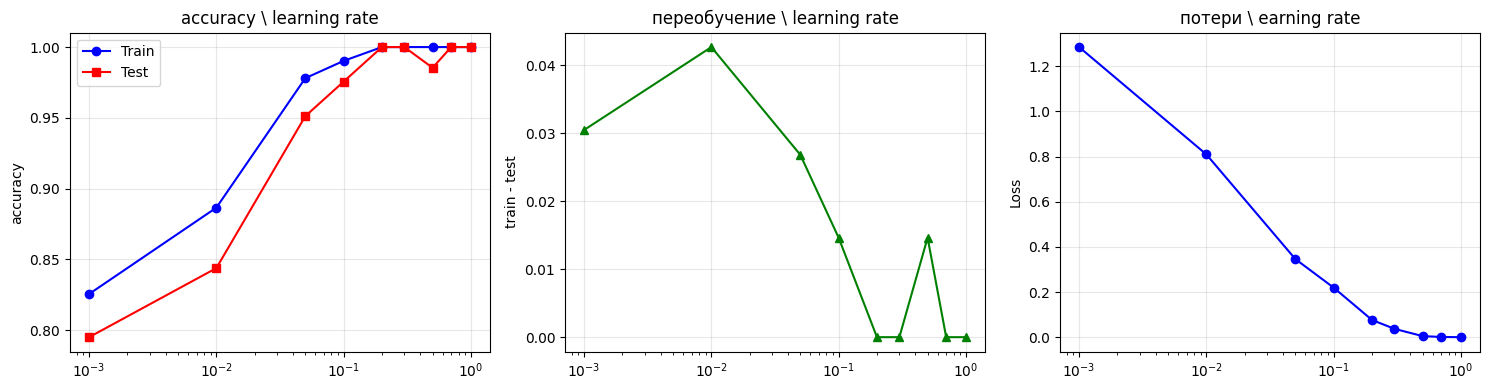

\opt learning_rate 0.200
accuracy 1.0000


In [14]:
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0]
results_lr = []

for lr in learning_rates:
    gb = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=lr,
        random_state=42
    )
    gb.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, gb.predict(X_train))
    test_acc = accuracy_score(y_test, gb.predict(X_test))
    results_lr.append({
        'learning_rate': lr,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'diff': train_acc - test_acc,
        'train_loss': gb.train_score_[-1]
    })
    
    print(f"lr={lr:.3f}: Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}, "
          f"Loss={gb.train_score_[-1]:.4f}")

lr_df = pd.DataFrame(results_lr)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].plot(lr_df['learning_rate'], lr_df['train_acc'], 'b-o', label='Train')
axes[0].plot(lr_df['learning_rate'], lr_df['test_acc'], 'r-s', label='Test')
axes[0].set_ylabel('accuracy')
axes[0].set_title('accuracy \ learning rate')
axes[0].set_xscale('log')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(lr_df['learning_rate'], lr_df['diff'], 'g-^')
axes[1].set_ylabel('train - test')
axes[1].set_title('переобучение \ learning rate')
axes[1].set_xscale('log')
axes[1].grid(True, alpha=0.3)

axes[2].plot(lr_df['learning_rate'], lr_df['train_loss'], 'b-o')
axes[2].set_ylabel('Loss')
axes[2].set_title('потери \ earning rate')
axes[2].set_xscale('log')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

optimal_lr_idx = np.argmax(lr_df['test_acc'])
optimal_lr = lr_df.iloc[optimal_lr_idx]
print(f"\opt learning_rate {optimal_lr['learning_rate']:.3f}")
print(f"accuracy {optimal_lr['test_acc']:.4f}")

Посмотрим на обычный grid

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]}
gb = GradientBoostingClassifier(random_state=42)
random_search = GridSearchCV(
    gb,
    param_grid,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    verbose=1)

random_search.fit(X_train, y_train)
best_gb = random_search.best_estimator_
train_pred_best = best_gb.predict(X_train)
test_pred_best = best_gb.predict(X_test)
test_proba_best = best_gb.predict_proba(X_test)[:, 1]

print("\ngrid")
print(f"train accuracy {accuracy_score(y_train, train_pred_best):.4f}")
print(f"test accuracy{accuracy_score(y_test, test_pred_best):.4f}")

print(f"train-test {accuracy_score(y_train, train_pred_best) - accuracy_score(y_test, test_pred_best):.4f}")

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits

grid
train accuracy 1.0000
test accuracy1.0000
train-test 0.0000


In [24]:
for param, testue in random_search.best_params_.items():
    print(f"  • {param:20} = {testue}")

  • learning_rate        = 0.1
  • max_depth            = 5
  • max_features         = None
  • min_samples_leaf     = 2
  • min_samples_split    = 5
  • n_estimators         = 50
  • subsample            = 1.0


Идеальные параметры есть, модель достаточно компактна. Напишем свой вариант

In [16]:
class CustomGradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3,
                 min_samples_split=2, min_samples_leaf=1, subsample=1.0,
                 random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.subsample = subsample
        self.random_state = random_state
        self.trees = []
        self.initial_prediction = None
        if random_state is not None:
            np.random.seed(random_state)
    
    class DecisionTree:
        def __init__(self, max_depth=3, min_samples_split=2, min_samples_leaf=1):
            self.max_depth = max_depth
            self.min_samples_split = min_samples_split
            self.min_samples_leaf = min_samples_leaf
            self.tree = None
            
        def _mse(self, y, y_pred):
            return np.mean((y - y_pred) ** 2)
        
        def _best_split(self, X, y):
            m, n = X.shape
            if m <= self.min_samples_split:
                return None, None   
            best_mse = float('inf')
            best_feature, best_threshold = None, None
            for feature_idx in range(n):
                thresholds = np.unique(X[:, feature_idx])
                for threshold in thresholds:
                    left_indices = X[:, feature_idx] <= threshold
                    right_indices = X[:, feature_idx] > threshold
                    if np.sum(left_indices) < self.min_samples_leaf or np.sum(right_indices) < self.min_samples_leaf:
                        continue
                    y_left = y[left_indices]
                    y_right = y[right_indices]
                    if len(y_left) == 0 or len(y_right) == 0:
                        continue
                    mse_left = np.var(y_left) * len(y_left)
                    mse_right = np.var(y_right) * len(y_right)
                    total_mse = mse_left + mse_right
                    if total_mse < best_mse:
                        best_mse = total_mse
                        best_feature = feature_idx
                        best_threshold = threshold
            return best_feature, best_threshold
        
        def _build_tree(self, X, y, depth=0):
            if (depth >= self.max_depth or 
                len(y) < self.min_samples_split or
                len(np.unique(y)) == 1):
                return np.mean(y)
            feature_idx, threshold = self._best_split(X, y)
            if feature_idx is None:
                return np.mean(y)
            left_indices = X[:, feature_idx] <= threshold
            right_indices = X[:, feature_idx] > threshold
            if (np.sum(left_indices) < self.min_samples_leaf or 
                np.sum(right_indices) < self.min_samples_leaf):
                return np.mean(y)
            node = {
                'feature': feature_idx,
                'threshold': threshold,
                'left': self._build_tree(X[left_indices], y[left_indices], depth + 1),
                'right': self._build_tree(X[right_indices], y[right_indices], depth + 1)}
            return node
        
        def fit(self, X, y):
            self.tree = self._build_tree(X, y)
        
        def _predict_single(self, x, node):
            if isinstance(node, dict):
                if x[node['feature']] <= node['threshold']:
                    return self._predict_single(x, node['left'])
                else:
                    return self._predict_single(x, node['right'])
            else:
                return node
        
        def predict(self, X):
            return np.array([self._predict_single(x, self.tree) for x in X])
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))
    
    def _log_loss_gradient(self, y, y_pred):
        p = self._sigmoid(y_pred)
        return y - p
    
    def fit(self, X, y):
        X_array = np.array(X)
        y_array = np.array(y).astype(float)
        pos_class_ratio = np.mean(y_array)
        self.initial_prediction = np.log(pos_class_ratio / (1 - pos_class_ratio + 1e-10))
        current_predictions = np.full_like(y_array, self.initial_prediction, dtype=float)
        self.trees = []
        for i in range(self.n_estimators):
            gradients = self._log_loss_gradient(y_array, current_predictions)
            if self.subsample < 1.0:
                n_samples = X_array.shape[0]
                subsample_size = int(n_samples * self.subsample)
                indices = np.random.choice(n_samples, subsample_size, replace=False)
                X_subsample = X_array[indices]
                gradients_subsample = gradients[indices]
            else:
                X_subsample = X_array
                gradients_subsample = gradients
            tree = self.DecisionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf)
            tree.fit(X_subsample, gradients_subsample)
            tree_predictions = tree.predict(X_array)
            current_predictions += self.learning_rate * tree_predictions
            self.trees.append(tree)
    def predict_proba(self, X):
        X_array = np.array(X)
        predictions = np.full(X_array.shape[0], self.initial_prediction, dtype=float)
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X_array)
        proba = self._sigmoid(predictions)
        return np.column_stack([1 - proba, proba])
    
    def predict(self, X, threshold=0.5):
        proba = self.predict_proba(X)
        return (proba[:, 1] >= threshold).astype(int)
    
    


custom_gb = CustomGradientBoostingClassifier(
    n_estimators=50,  
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    subsample=0.8,
    random_state=42)
custom_gb.fit(X_train.testues, y_train.testues)
y_pred_custom = custom_gb.predict(X_test.testues)
y_proba_custom = custom_gb.predict_proba(X_test.testues)[:, 1]

print("my")
print(f"Test accuracy {accuracy_score(y_test, y_pred_custom):.4f}")
print(f"Test F1-score{f1_score(y_test, y_pred_custom):.4f}")

gb_sklearn = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    subsample=0.8,
    random_state=42
)
gb_sklearn.fit(X_train, y_train)
y_pred_sklearn = gb_sklearn.predict(X_test)

print(f"Sklearn Accuracy: {accuracy_score(y_test, y_pred_sklearn):.4f}")
print(f"Sklearn F1-score: {f1_score(y_test, y_pred_sklearn):.4f}")
print(f"Разница Accuracy: {accuracy_score(y_test, y_pred_custom) - accuracy_score(y_test, y_pred_sklearn):.4f}")

my
Test accuracy 0.8537
Test F1-score0.8636
Sklearn Accuracy: 0.9220
Sklearn F1-score: 0.9245
Разница Accuracy: -0.0683


Разница минимальна, найдем лучший lr при остальных фиксированных

In [21]:
learning_rates_custom = [0.01, 0.05, 0.1, 0.2, 0.3]
best_custom_score = 0
best_custom_lr = 0.1

for lr in learning_rates_custom:
    custom_gb = CustomGradientBoostingClassifier(
        n_estimators=50,
        learning_rate=lr,
        max_depth=3,
        min_samples_split=5,
        subsample=0.8,
        random_state=42
    )
    custom_gb.fit(X_train.testues, y_train.testues)
    y_pred = custom_gb.predict(X_test.testues)
    score = accuracy_score(y_test, y_pred)
    
    print(f"LR = {lr:.2f}: accuracy = {score:.4f}")
    
    if score > best_custom_score:
        best_custom_score = score
        best_custom_lr = lr

print(f"opt LR {best_custom_lr}")

final_custom_gb = CustomGradientBoostingClassifier(
    n_estimators=100,
    learning_rate=best_custom_lr,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=2,
    subsample=0.9,
    random_state=42
)

final_custom_gb.fit(X_train.testues, y_train.testues)
y_pred_final_custom = final_custom_gb.predict(X_test.testues)
y_proba_final_custom = final_custom_gb.predict_proba(X_test.testues)[:, 1]

print("\my2")
print(f"test Accuracy: {accuracy_score(y_test, y_pred_final_custom):.4f}")
print(f"test F1-score: {f1_score(y_test, y_pred_final_custom):.4f}")

LR = 0.01: accuracy = 0.8098
LR = 0.05: accuracy = 0.8341
LR = 0.10: accuracy = 0.8537
LR = 0.20: accuracy = 0.8829
LR = 0.30: accuracy = 0.9073
opt LR 0.3
\my2
test Accuracy: 0.9268
test F1-score: 0.9296


### Для задачи регрессии

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_id = train['Id']
test_id = test['Id']

y = train['SalePrice'].copy()
X = train.drop(['Id', 'SalePrice'], axis=1)
X_test = test.drop('Id', axis=1)
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
missing_testues = X.isnull().sum().sort_testues(ascending=False)
missing_testues = missing_testues[missing_testues > 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_testue='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])
pipeline.fit(X_train, y_train)

y_train_pred_pipe = pipeline.predict(X_train)
y_test_pred_pipe = pipeline.predict(X_test)

print(f"\nbase")
print(f"train R2 {r2_score(y_train, y_train_pred_pipe):.4f}")
print(f"test R2  {r2_score(y_test, y_test_pred_pipe):.4f}")


base
train R2 0.9706
test R2  0.9008


In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

all_data = pd.concat([X, X_test]).reset_index(drop=True)

y = train['SalePrice'].copy()
X = train.drop(['Id', 'SalePrice'], axis=1)
X_test = test.drop('Id', axis=1)

y_log = np.log1p(y)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

def create_features(df):
    df = df.copy()
    df['TotalSF'] = df.get('TotalBsmtSF', 0) + df.get('1stFlrSF', 0) + df.get('2ndFlrSF', 0)
    df['TotalBath'] = df.get('FullBath', 0) + 0.5 * df.get('HalfBath', 0) + df.get('BsmtFullBath', 0) + 0.5 * df.get('BsmtHalfBath', 0)
    df['HouseAge'] = df.get('YrSold', 2023) - df.get('YearBuilt', 2000)
    df['RemodAge'] = df.get('YrSold', 2023) - df.get('YearRemodAdd', 2000)
    df['TotalPorchSF'] = df.get('OpenPorchSF', 0) + df.get('EnclosedPorch', 0) + df.get('3SsnPorch', 0) + df.get('ScreenPorch', 0)
    df['OverallQual_TotalSF'] = df.get('OverallQual', 5) * df.get('TotalSF', 1500)
    return df

def remove_outliers(df, y_series=None):
    df = df.copy()
    if y_series is not None:
        mask = (df['GrLivArea'] < 4500) & (np.expm1(y_series) < 300000)
        return df[mask], y_series[mask]
    return df

X_train_no_outliers, y_train_no_outliers = remove_outliers(X_train, y_train_log)
X_test_no_outliers, y_test_no_outliers = remove_outliers(X_test, y_test_log)

def preprocess_data(X_train, X_test, y_train=None):
    X_train_proc = create_features(X_train)
    X_test_proc = create_features(X_test)
    
    numeric_cols_proc = X_train_proc.select_dtypes(include=[np.number]).columns
    categorical_cols_proc = X_train_proc.select_dtypes(exclude=[np.number]).columns
    
    numeric_imputer = SimpleImputer(strategy='median')
    X_train_proc[numeric_cols_proc] = numeric_imputer.fit_transform(X_train_proc[numeric_cols_proc])
    X_test_proc[numeric_cols_proc] = numeric_imputer.transform(X_test_proc[numeric_cols_proc])
    
    if len(categorical_cols_proc) > 0:
        categorical_imputer = SimpleImputer(strategy='most_frequent')
        X_train_proc[categorical_cols_proc] = categorical_imputer.fit_transform(X_train_proc[categorical_cols_proc])
        X_test_proc[categorical_cols_proc] = categorical_imputer.transform(X_test_proc[categorical_cols_proc])
        
        for col in categorical_cols_proc:
            le = LabelEncoder()
            combined = pd.concat([X_train_proc[col], X_test_proc[col]], axis=0)
            le.fit(combined.astype(str).fillna('Missing'))
            X_train_proc[col] = le.transform(X_train_proc[col].astype(str).fillna('Missing'))
            X_test_proc[col] = le.transform(X_test_proc[col].astype(str).fillna('Missing'))
    
    scaler = StandardScaler()
    if len(numeric_cols_proc) > 0:
        X_train_proc[numeric_cols_proc] = scaler.fit_transform(X_train_proc[numeric_cols_proc])
        X_test_proc[numeric_cols_proc] = scaler.transform(X_test_proc[numeric_cols_proc])
    
    X_train_proc = X_train_proc.astype(float)
    X_test_proc = X_test_proc.astype(float)
    
    return X_train_proc, X_test_proc

X_train_processed, X_test_processed = preprocess_data(X_train_no_outliers, X_test_no_outliers, y_train_no_outliers)

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    min_samples_split=5,
    random_state=42
)

gb_model.fit(X_train_processed, y_train_no_outliers)

y_train_pred_log = gb_model.predict(X_train_processed)
y_test_pred_log = gb_model.predict(X_test_processed)

y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)

y_train_actual = np.expm1(y_train_no_outliers)
y_test_actual = np.expm1(y_test_no_outliers)

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train_actual, y_train_pred)):.2f}")
print(f"test RMSE:  {np.sqrt(mean_squared_error(y_test_actual, y_test_pred)):.2f}")
print(f"Train MAE:  {mean_absolute_error(y_train_actual, y_train_pred):.2f}")
print(f"test MAE:   {mean_absolute_error(y_test_actual, y_test_pred):.2f}")
print(f"Train R2:   {r2_score(y_train_actual, y_train_pred):.4f}")
print(f"test R2:    {r2_score(y_test_actual, y_test_pred):.4f}")

Train RMSE: 10892.18
test RMSE:  17061.37
Train MAE:  8218.77
test MAE:   12327.10
Train R²:   0.9552
test R²:    0.9021


In [51]:
from sklearn.tree import DecisionTreeRegressor

class CustomGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        self.initial_prediction = None
        
    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        predictions = np.full_like(y, self.initial_prediction, dtype=float)
        
        for i in range(self.n_estimators):
            residuals = y - predictions
            
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                random_state=self.random_state
            )
            tree.fit(X, residuals)
            
            tree_pred = tree.predict(X)
            predictions += self.learning_rate * tree_pred
            
            self.trees.append(tree)
    
    def predict(self, X):
        predictions = np.full(X.shape[0], self.initial_prediction, dtype=float)
        
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
            
        return predictions
    
    def get_params(self, deep=True):
        return {
            'n_estimators': self.n_estimators,
            'learning_rate': self.learning_rate,
            'max_depth': self.max_depth,
            'random_state': self.random_state
        }
    
    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self
    
custom_gb = CustomGradientBoosting(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

custom_gb.fit(X_train_processed, y_train_no_outliers)

y_train_pred_log = gb_model.predict(X_train_processed)
y_test_pred_log = gb_model.predict(X_test_processed)

y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)

y_train_actual = np.expm1(y_train_no_outliers)
y_test_actual = np.expm1(y_test_no_outliers)

print("my")

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train_actual, y_train_pred)):.2f}")
print(f"test RMSE:  {np.sqrt(mean_squared_error(y_test_actual, y_test_pred)):.2f}")
print(f"Train MAE:  {mean_absolute_error(y_train_actual, y_train_pred):.2f}")
print(f"test MAE:   {mean_absolute_error(y_test_actual, y_test_pred):.2f}")
print(f"Train R2:   {r2_score(y_train_actual, y_train_pred):.4f}")
print(f"test R2:    {r2_score(y_test_actual, y_test_pred):.4f}")


my
Train RMSE: 10892.18
test RMSE:  17061.37
Train MAE:  8218.77
test MAE:   12327.10
Train R2:   0.9552
test R2:    0.9021


Результаты совпали